Comenzamos importando las librerias necesarias. Como utilizaremos Kmeans para poder realizar nuestros clusters, tambien lo incluimos.

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Leemos nuestro dataset en cuestion.

In [310]:
df = pd.read_csv("all_csv sorted.csv")
df

,S.NO,Country code,Country,Continental region,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020),Internet users,Population,Avg \n(Mbit/s)Ookla
0,0,IL,Israel,NEAR EAST,27.0,0.05,0.02,20.95,0.11,0.9,"6,788,737","8,381,516",28.01
1,1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,0.15,0.10,7.08,0.21,0.27,"2,309,235","6,304,030",16.30
2,2,FJ,Fiji,OCEANIA,18.0,0.19,0.05,0.85,0.59,3.57,"452,479","883,483",25.99
3,3,IT,Italy,WESTERN EUROPE,29.0,0.27,0.09,3.54,0.43,1.73,"50,540,000","60,627,291",37.15
4,4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,0.27,0.03,0.92,0.63,0.68,"12,512,639","41,801,533",9.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,239,VA,Vatican City (Holy See),Europe,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,240,VE,Venezuela,SOUTH AMERICA,NaN,HYPERINFLATION,NaN,NaN,NaN,NaN,"20,564,451","28,887,118",5.68
239,241,WF,Wallis and Futuna,OCEANIA,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN,"1,383","11,661",NaN
240,242,CD,Democratic Republic of the Congo,SUB-SAHARAN AFRICA,NaN,Prices listed in non-convertible 'units',NaN,NaN,NaN,NaN,"7,011,507","84,068,091",12.08


Para evitar errores dentro del algoritmo, sacamos algunos de las columnas que simplemente estorbaran.

In [311]:
df.dropna()
df.drop('Avg \n(Mbit/s)Ookla', axis=1,inplace=True)
df.drop('S.NO', axis=1,inplace=True)
df.drop('Country code', axis=1,inplace=True)
df.columns

Index(['Country', 'Continental region', 'NO. OF Internet Plans',
       'Average price of 1GB (USD)', 'Cheapest 1GB for 30 days (USD)',
       'Most expensive 1GB (USD)',
       'Average price of 1GB (USD  at the start of 2021)',
       'Average price of 1GB (USD – at start of 2020)', 'Internet users',
       'Population'],
      dtype='object')

Buscamos valores nulos dentro de nuestro dataset, ya que si no los excluimos, pueden llegar a ser problematicos.

In [312]:
df.isnull().sum()

Country                                              0
Continental region                                   0
NO. OF Internet Plans                               11
Average price of 1GB (USD)                           0
Cheapest 1GB for 30 days (USD)                      11
Most expensive 1GB (USD)                            11
Average price of 1GB (USD  at the start of 2021)    11
Average price of 1GB (USD – at start of 2020)       11
Internet users                                      30
Population                                          32
dtype: int64

Al parecer si se tienen muchos registros con datos nulos, pero aparte de ellos, se presentan algunos registros con nombres categoricos, por ende, tambien deben ser eliminados.

In [313]:
df.drop(df[df['Average price of 1GB (USD  at the start of 2021)'] == 'NO PROVIDERS'].index,inplace = True)
df.drop(df[df['Average price of 1GB (USD  at the start of 2021)'] == 'HYPERINFLATION'].index,inplace = True)
df.drop(df[df['Average price of 1GB (USD  at the start of 2021)'] == "Prices listed in non-convertible 'units'"].index,inplace = True)


In [314]:
df.drop(df[df['NO. OF Internet Plans'].isnull()].index, inplace=True)
df.drop(df[df['Population'].isnull()].index, inplace=True)

In [315]:
df['Average price of 1GB (USD  at the start of 2021)'].unique()
df.drop(df[df['Average price of 1GB (USD  at the start of 2021)'] == 'NO PACKAGES'].index,inplace=True)
df.drop(df[df['Average price of 1GB (USD – at start of 2020)'] == 'NO PACKAGES'].index,inplace=True)

Normalmente, dentro de los dataset que solemos utilizar, las caracteristicas numericas estan en su formato, pero en este caso, están en formato String. Tenemos que convertirlos a Int o en su caso, Flotante.

In [316]:
Columnas = ['Population','Internet users']
df[Columnas] = df[Columnas].replace({',':''},regex=True)
df[Columnas] = df[Columnas].astype(int)

df['Internet users'] = df['Internet users'].replace({',':''},regex=True)
df['Internet users'] = df['Internet users'].astype(int)

df['NO. OF Internet Plans'] = df['NO. OF Internet Plans'].astype(int)

Columnas = ['Average price of 1GB (USD)','Cheapest 1GB for 30 days (USD)',
            'Most expensive 1GB (USD)','Average price of 1GB (USD  at the start of 2021)',
            'Average price of 1GB (USD – at start of 2020)']

df[Columnas] = df[Columnas].astype(float)

Usando .info(), podemos ver la informacion de cada columna y asi verificar su tipo.

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 230
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country                                           200 non-null    object 
 1   Continental region                                200 non-null    object 
 2   NO. OF Internet Plans                             200 non-null    int64  
 3   Average price of 1GB (USD)                        200 non-null    float64
 4   Cheapest 1GB for 30 days (USD)                    200 non-null    float64
 5   Most expensive 1GB (USD)                          200 non-null    float64
 6   Average price of 1GB (USD  at the start of 2021)  200 non-null    float64
 7   Average price of 1GB (USD – at start of 2020)     200 non-null    float64
 8   Internet users                                    200 non-null    int64  
 9   Population           

Para tener una mejor maniobra de los datos, tomaremos solamente los paises con la poblacion mayor o igual a 10,000,000, para despues escalar los datos usando Internet users como nuestro objetivo.

In [318]:
df = df[(df['Population'] >= 10000000)]
X = df.iloc[:,7:]
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-7.04151272e-01, -4.72430644e-02, -1.20521697e-01],
       [-8.76780613e-01, -3.07023267e-01, -2.08242859e-01],
       [-8.38966567e-01,  4.54591751e-01,  2.76044688e-01],
       [-8.25813855e-01,  4.89978415e-01,  3.71890865e-01],
       [-8.60339723e-01, -3.43854930e-01, -3.04104460e-01],
       [-6.81134027e-01, -2.90957059e-01, -3.15751698e-01],
       [-7.89643898e-01,  1.37613585e-02, -1.00190684e-01],
       [-4.96996063e-01,  9.46452720e-01,  8.44224305e-01],
       [-7.73203008e-01,  7.32091370e-02,  4.21865678e-02],
       [-1.41872847e-01, -2.12494687e-01, -2.06253778e-01],
       [ 6.37425320e-01,  6.51226946e+00,  6.24929497e+00],
       [-6.84422205e-01,  4.19068459e-01,  5.93003541e-01],
       [-9.08018303e-01, -2.97452063e-01, -3.17660014e-01],
       [-4.50961572e-01, -2.78469256e-01, -2.51695303e-01],
       [ 2.91124045e-02, -3.90487893e-01, -3.33089893e-01],
       [-6.18658646e-01, -2.81901735e-01, -2.72106974e-01],
       [-6.18658646e-01,  8.53264804e-02

Aplicando Kmeans, utilizaremos 6 clusters máximos para repartir dentro de la poblacion, asi será más facil identificar cada uno de ellos por sus caracteristicas.

In [319]:
clusterNum = 6
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 6)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 0 0 2 2 2 0 2 5 1 0 2 2 5 2 2 2 2 1 2 5 2 2 4 2 0 2 2 2 0 2 2 2 5 2 2
 2 5 2 2 2 2 3 5 5 2 2 5 5 2 2 5 5 4 5 2 5 5 5 4 2 4 0 5 4 3 4 4 5 4 5 5 2
 4 4 5 3 5 4 3 2]


Con el método del codo, podemos obtener de forma rápida la mejor opción de clusters en nuestro dataset.

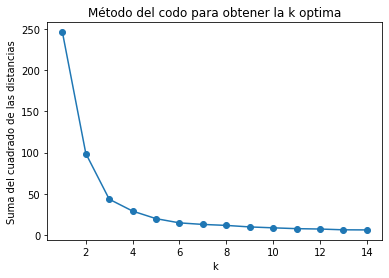

In [320]:

Sum_of_squared_distances = []

# Se usa k de 1 to 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=500,  tol=1e-04, random_state=42)
    km = km.fit(X)
    # Se obtiene la suma de las distancias al cuadrado aplicando km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)

# Gráfica de los resultados
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Suma del cuadrado de las distancias')
plt.title('Método del codo para obtener la k optima')
plt.show()

Para no quedarnos solo con el método del codo, utilizaremos una grafica para cada cluster en especifico, obteniendo su promedio en la silueta, aparte que al verse graficamente, es más comprensible.

Para n_clusters = 2 El promerdio de silhouette_score es : 0.8619050442865095
Para n_clusters = 3 El promerdio de silhouette_score es : 0.6371036599004852
Para n_clusters = 4 El promerdio de silhouette_score es : 0.5061314541146998
Para n_clusters = 5 El promerdio de silhouette_score es : 0.527609950718134
Para n_clusters = 6 El promerdio de silhouette_score es : 0.4799003381191045


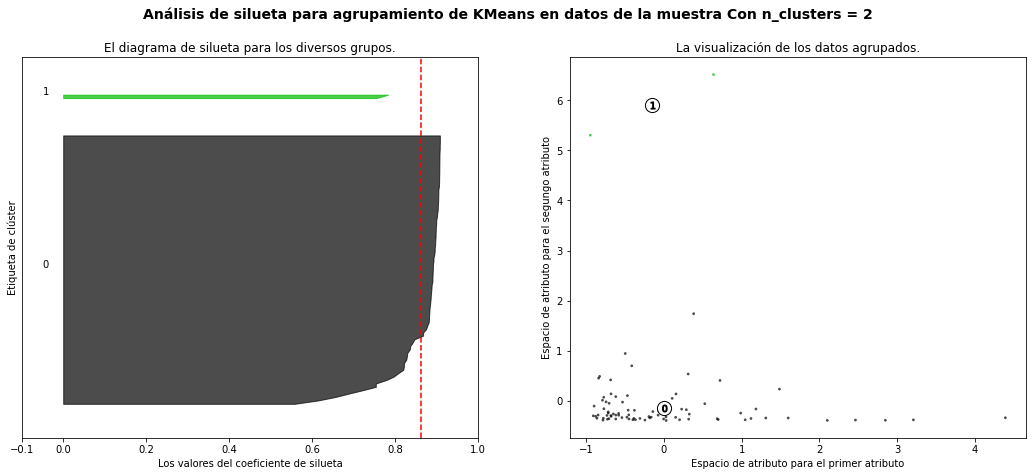

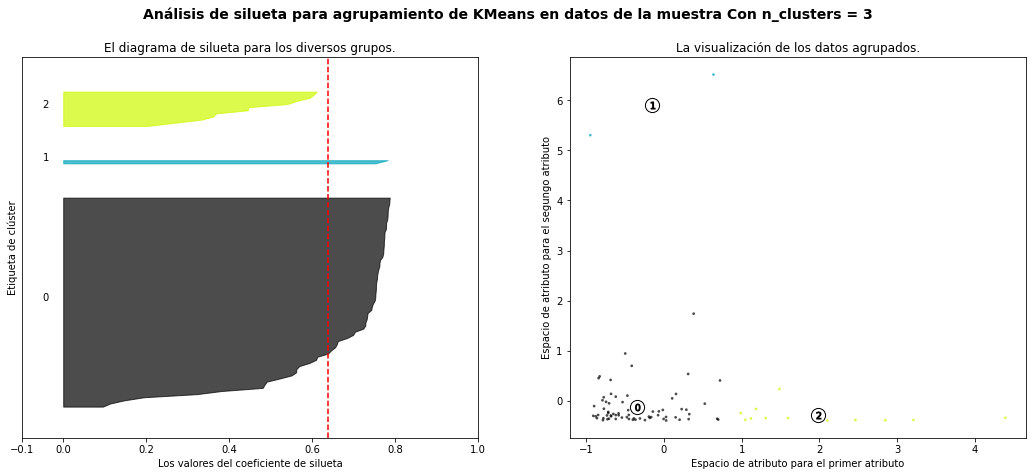

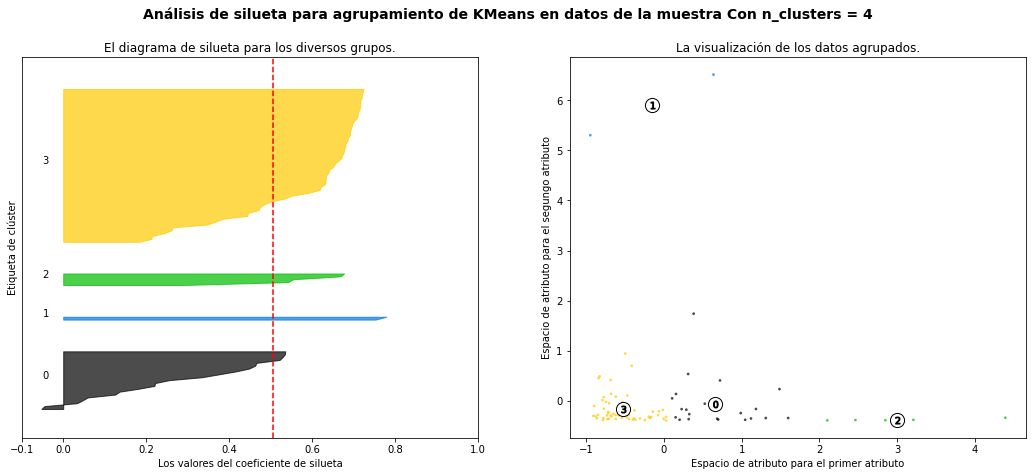

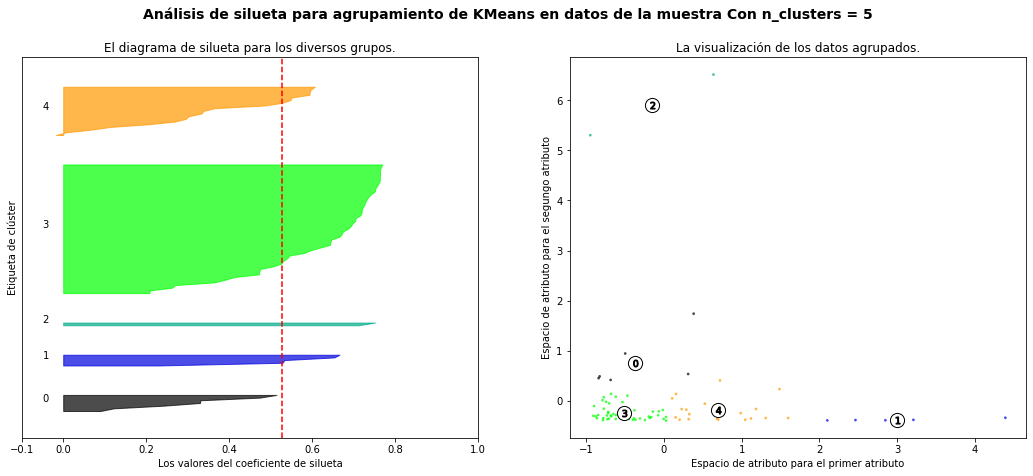

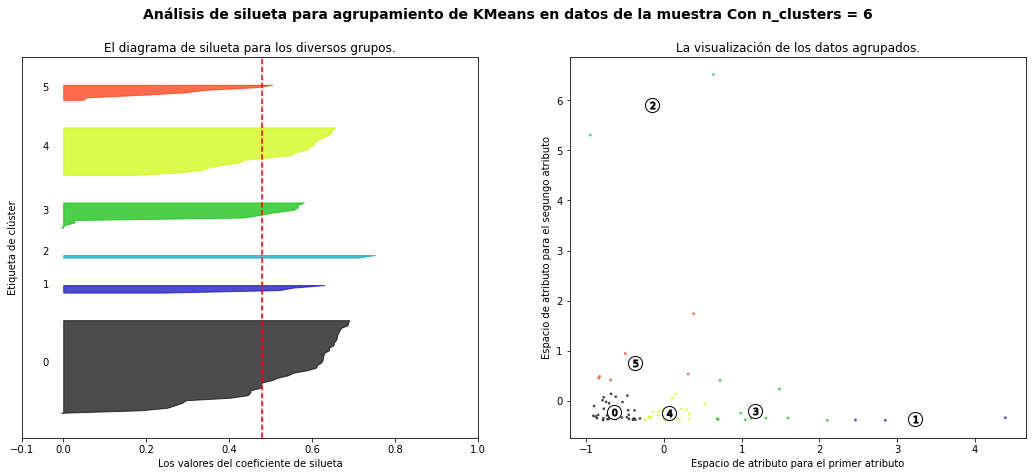

In [321]:

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Crear una sub gráfica con 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # La primera subtrama es la trama de silueta.
    # El coeficiente de silueta puede oscilar entre -1, 1 pero en este ejemplo todos
    # se encuentran dentro de [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
    # Gráficos de conglomerados individuales, para delimitarlos claramente.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inicialice el clúster con valor n_clusters y un generador aleatorio
    # semilla de 10 para la reproducibilidad.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # El silhouette_score da el valor promedio de todas las muestras.
    # Esto da una perspectiva de la densidad y separación de los formados.
    # clúster
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promerdio de silhouette_score es :", silhouette_avg)

    # Calcule las puntuaciones de la silueta para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agregue los puntajes de silueta para las muestras pertenecientes a
        # clúster i, y se ordenan
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Se etiquetan los gráficos de la silueta con sus números de clúster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcule el nuevo y_lower para la próxima gráfica
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("El diagrama de silueta para los diversos grupos.")
    ax1.set_xlabel("Los valores del coeficiente de silueta")
    ax1.set_ylabel("Etiqueta de clúster")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("La visualización de los datos agrupados.")
    ax2.set_xlabel("Espacio de atributo para el primer atributo")
    ax2.set_ylabel("Espacio de atributo para el segungo atributo")

    plt.suptitle(("Análisis de silueta para agrupamiento de KMeans en datos de la muestra "
                  "Con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Antes de acabar, podemos observar en una grafica como estos clusters se dividen por mdeio del Precio y la cantidad de Usuarios en internet.

<ipython-input-322-315d2661b4a1>:2: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



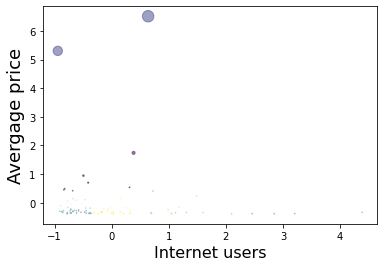

In [322]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.ylabel('Avergage price', fontsize=18)
plt.xlabel('Internet users', fontsize=16)

plt.show()

Para terminar, confirmaremos los resultados con una grafica de barras, que mostrará los países con la mayor cantidad de usuarios en internet.

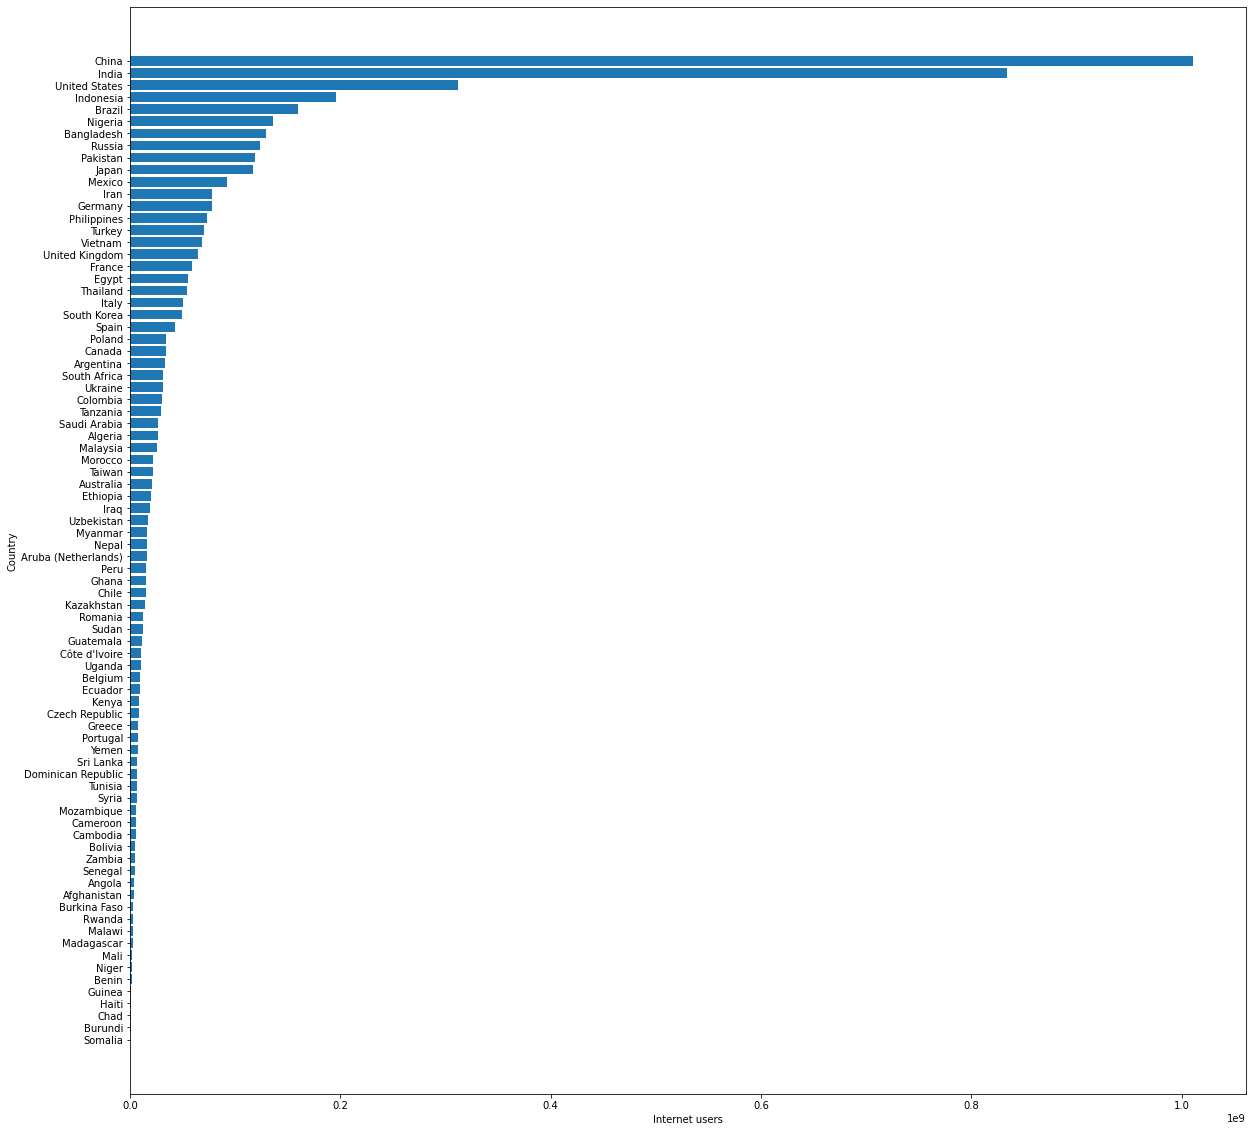

In [323]:
X = df.sort_values(by = 'Internet users')['Country']
Y = df.sort_values(by = 'Internet users')['Internet users']
f = plt.figure()
f.set_size_inches(20, f.get_figheight()*5, forward=True)
plt.barh(X,Y)
plt.xlabel('Internet users')
plt.ylabel('Country')
plt.show()